# ANTsImage vs Nibabel

Perform some experiments to analyze the differences between `ANTsImage` objects and `nibabel` objects in terms of image orientation, etc...

In [1]:
import os
import ants
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

Choose one image to compare: 
 + MNI template 'data/MNI152_T1_1mm.nii.gz'
 + T1 LPI 'data/T1.nii.gz'
 + FLAIR MS 'dat/FLAIR_time1.nii.gz'

In [2]:
IM = 'data/FLAIR_time1.nii.gz'
z_slice = 80

## 1. ANTS: 

Open and show the selected image using `ANTsImage`: 

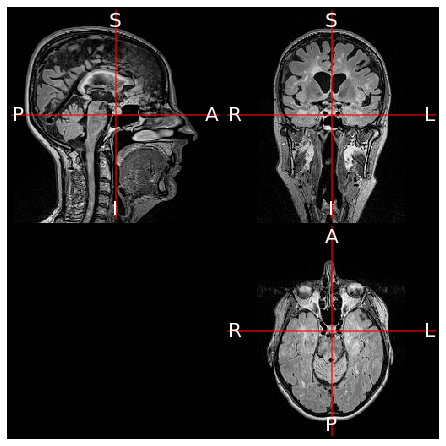

In [3]:
# MNI_TEMPLATE = 'data/MNI152_T1_1mm.nii.gz'
image_ants = ants.image_read(IM)
image_ants.plot_ortho()
ants_sample = image_ants.numpy()[:,:,z_slice]

## 2. nibabel:

Open and show the same image using `nibabel`:

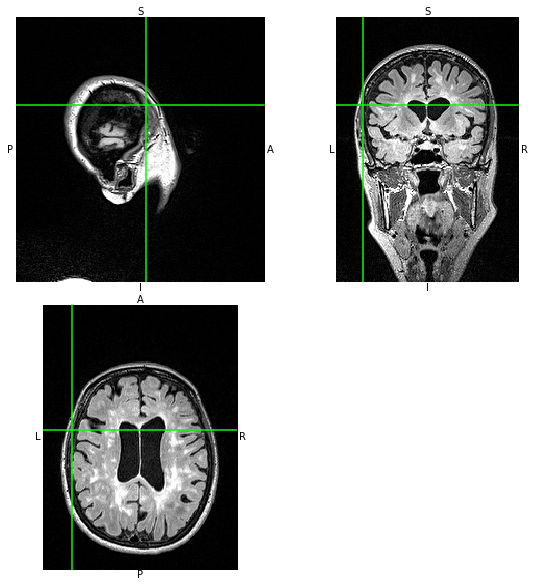

In [4]:
image_nib = nib.load(IM)
nib.viewers.OrthoSlicer3D(image_nib.get_data(), affine=image_nib.affine).show()
nibabel_sample = np.squeeze(image_nib.get_data()[:,:,z_slice])

From the results, it can be observed that each method introduce differences in the `data_shape`. This can be problematic in some circusmtances, for instance, with 3D images with a 4D `data_shape` matrix $(x, y, z, 1)$. In the case of `nibabel`, it replicates the DICOM information while `ANTS` squeeze the extra dimension automatically: 

In [5]:
print('IMAGE SIZE nibabel:', image_nib.shape)
print('IMAGE SIZE ANTs: ', image_ants.shape)

IMAGE SIZE nibabel: (240, 256, 176, 1)
IMAGE SIZE ANTs:  (240, 256, 176)


As expected, in terms of the data structure, both methods extract the information the same way. This is the result of a particular slice in the `z` dimension:

Text(0.5, 1.0, 'NIBABEL slice')

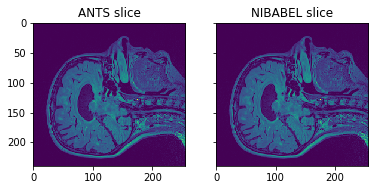

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(ants_sample)
ax1.set_title('ANTS slice')
ax2.imshow(nibabel_sample)
ax2.set_title('NIBABEL slice')



## 3. Canonical coordinates (RAS)

Sometimes you may want to rearrange the image voxel axes to make them as close as possible to RAS+ orientation. We refer to this voxel orientation as canonical voxel orientation, because RAS+ is our canonical world orientation. Rearranging the voxel axes means reversing and / or reordering the voxel axes.

We explore the effect of moving the input images into the canonical orientation. `nibabel` handles this using `nic.as_closest_canonical(nib_file)`, while `ANTS` apparently does not handle this, but can be easily done by converting the `ANTsImage` object to `nibabel`, rearranging voxles and converting back to `ANTsImg`. 

Text(0.5, 1.0, 'ANTS canonical')

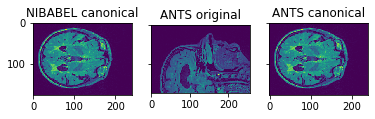

In [9]:
z_slice = 150

# in nibabel
image_nib_canonical = nib.as_closest_canonical(image_nib)
nibabel_sample_canonical = np.squeeze(image_nib_canonical.get_data())[:,:,z_slice]

# in ANTS
# ANTS --> nibabel -> canonical -> ANTS
image_ants_canonical = ants.from_nibabel(nib.as_closest_canonical(image_ants.to_nibabel())) 
ants_sample_canonical = image_ants_canonical.numpy()[:,:,z_slice]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.imshow(nibabel_sample_canonical)
ax1.set_title('NIBABEL canonical')
ax2.imshow(ants_sample)
ax2.set_title('ANTS original')
ax3.imshow(ants_sample_canonical)
ax3.set_title('ANTS canonical')
